<a href="https://colab.research.google.com/github/ydydydydydy/Colab/blob/main/ex03_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%A8%EC%88%98%2Ccallback%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 활성화함수와 경사하강법 최적의 조합을 확인해보자
- 모델링에 도움이 되는 callback 함수(모델저장, 조기학습중단) 을 알아보자!

##### 데이터 로딩

In [ ]:
from tensorflow.keras.datasets import mnist # 손글씨 데이터

In [ ]:
# 데이터 분리
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 크기확인
(X_train.shape,y_train.shape), (X_test.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### 활성화 함수와 경사하강법 조합에 따른 성능비교
1. sigmoid + SGD 조합
2. relu + SGD 조합
3. relu + Adam 조합

In [ ]:
# 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 경사하강법 클래스 사용

In [ ]:
# 1. sigmoid + SGD 조합
# 1)신경망설계
# 뼈대
model1 = Sequential()
# 입력층
# 사진데이터 (2차원 -> 1차원)
model1.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model1.add(Dense(units = 64, activation = 'sigmoid'))
model1.add(Dense(units = 128, activation = 'sigmoid'))
model1.add(Dense(units = 256, activation = 'sigmoid'))
model1.add(Dense(units = 128, activation = 'sigmoid'))
model1.add(Dense(units = 64, activation = 'sigmoid'))
# 출력층
model1.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
#2) 학습방법및 평가방법 설정
model1.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = SGD(learning_rate = 0.01), #SGD 기본학습률: 0.01
               metrics = ['accuracy'])

In [ ]:
# 3) 학습  # epochs = 20
h1 = model1.fit(X_train,y_train,epochs = 20,
                validation_split=0.2,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 4s 7ms/step - loss: 2.3148 - accuracy: 0.1102 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/20
375/375 [==============================] - 2s 7ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.3016 - val_accuracy: 0.1060
Epoch 7/20
375/375 [==============================] - 4s 9ms/step - loss: 2.3007 - accuracy: 0.1151 - val_loss: 2.3018 - val_accuracy: 0.1060
Epoch 

######2.relu + SGD

In [ ]:
# 1)신경망설계
# 뼈대
model2 = Sequential()
# 입력층
# 사진데이터 (2차원 -> 1차원)
model2.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))
# 출력층
model2.add(Dense(units = 10, activation = 'softmax'))

#2) 학습방법및 평가방법 설정
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = SGD(learning_rate = 0.01), #SGD 기본학습률: 0.01
               metrics = ['accuracy'])

h2 = model2.fit(X_train,y_train,epochs = 20,
                validation_split=0.2,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/20
375/375 [============================

##### 3. relu + Adam

In [ ]:
# 1)신경망설계
# 뼈대
model3 = Sequential()
# 입력층
# 사진데이터 (2차원 -> 1차원)
model3.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))
# 출력층
model3.add(Dense(units = 10, activation = 'softmax'))

#2) 학습방법및 평가방법 설정
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = Adam(learning_rate = 0.001), #Adma 기본학습률: 0.001
               metrics = ['accuracy'])

h3 = model3.fit(X_train,y_train,epochs = 20,
                validation_split=0.2,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 5s 9ms/step - loss: 0.8104 - accuracy: 0.8223 - val_loss: 0.2757 - val_accuracy: 0.9178
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2300 - accuracy: 0.9330 - val_loss: 0.1947 - val_accuracy: 0.9420
Epoch 3/20
375/375 [==============================] - 4s 12ms/step - loss: 0.1594 - accuracy: 0.9519 - val_loss: 0.1999 - val_accuracy: 0.9440
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1308 - accuracy: 0.9604 - val_loss: 0.1630 - val_accuracy: 0.9534
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1063 - accuracy: 0.9671 - val_loss: 0.1716 - val_accuracy: 0.9511
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0955 - accuracy: 0.9710 - val_loss: 0.1437 - val_accuracy: 0.9613
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0814 - accuracy: 0.9758 - val_loss: 0.1609 - val_accuracy: 0.9569
Epoc

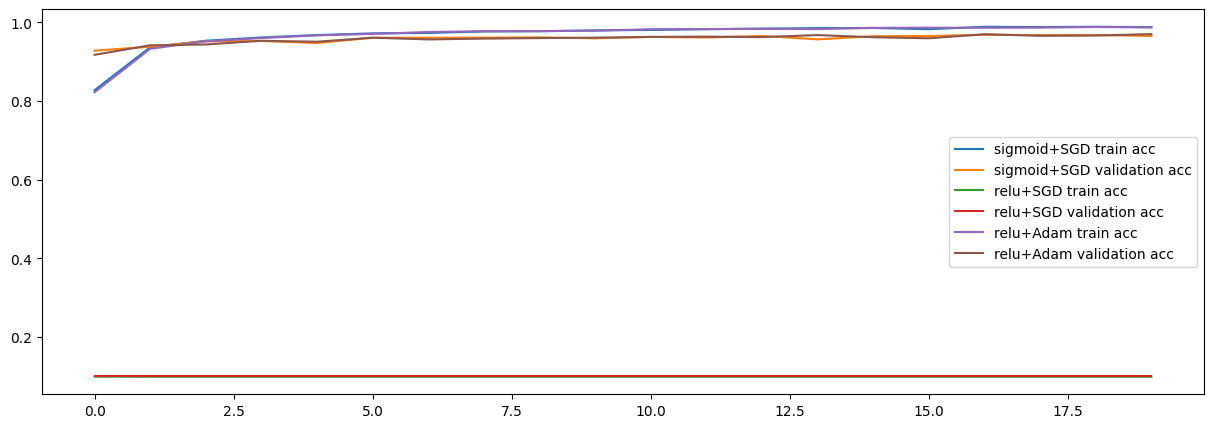

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
# sigmoid + SGD 조합
plt.plot(h1.history['accuracy'], label="sigmoid+SGD train acc")
plt.plot(h1.history['val_accuracy'], label="sigmoid+SGD validation acc")
# relu + SGD 조합
plt.plot(h2.history['accuracy'], label="relu+SGD train acc")
plt.plot(h2.history['val_accuracy'], label="relu+SGD validation acc")
# relu + Adam 조합
plt.plot(h3.history['accuracy'], label="relu+Adam train acc")
plt.plot(h3.history['val_accuracy'], label="relu+Adam validation acc")

plt.legend()
plt.show()

### callback 함수
- 모델저장 및 조기학습중단
- 모델저장 (ModelCheckPoint)
  - 딥러닝모델 학습시 지정된 epoch 를 다 끝내면 과대적합이 일어나는 경우가 있다 -> 중간에 일반화된 모델을 저장할 수 있는 기능!!
- 조기학습 중단(EarlyStopping)
  - epoch 를 크게 설정할 경우 일정횟수 이상으로는 모델의 성능이 개선되지 않는 경우가 있다.  -> 시간낭비 -> 모델의 성능이 개선되지 않는 경우에는 조기중단이 필요

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 모델 중간 저장
# 모델 중간 멈춤

In [ ]:
# 모델 저장
# 저장될 경로 작성
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_{epoch:02d}_{val_accuracy:0.2f}.hdf5'
mckp = ModelCheckpoint(filepath = model_path, # 저장경로
                verbose = 1, # 로그 출력 -> 1: 로그출력 0
                save_best_only = True, # 모델성능이 최고점을 갱신할때마다 저장
                monitor = 'val_accuracy') #  최고점의 기준치
# 콜백객체 생성완료~
# 사용한것은 아님!

In [ ]:
# 조기학습 중단
early = EarlyStopping(monitor = 'val_accuracy', #기준치
                      verbose = 1, # 로그출력
                      patience = 10) # 모델성능개선을 기다리는 최대 횟수

In [ ]:
# 3 번째 조합으로 모델링
# 1)신경망설계
# 뼈대
model3 = Sequential()
# 입력층
# 사진데이터 (2차원 -> 1차원)
model3.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))
# 출력층
model3.add(Dense(units = 10, activation = 'softmax'))

#2) 학습방법및 평가방법 설정
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = Adam(learning_rate = 0.001), #Adma 기본학습률: 0.001
               metrics = ['accuracy'])

h3 = model3.fit(X_train,y_train,epochs = 1000,
                validation_split=0.2,
                batch_size = 128,
                callbacks = [mckp, early])

Epoch 1/1000
372/375 [============================>.] - ETA: 0s - loss: 0.9829 - accuracy: 0.8056
Epoch 1: val_accuracy improved from -inf to 0.91225, saving model to /content/drive/MyDrive/Colab Notebooks/23.09.15 DeepLearning (Spring)/data/digit_model/dm_01_0.91.hdf5
375/375 [==============================] - 4s 8ms/step - loss: 0.9778 - accuracy: 0.8063 - val_loss: 0.2925 - val_accuracy: 0.9122
Epoch 2/1000
 17/375 [>.............................] - ETA: 2s - loss: 0.2744 - accuracy: 0.9237

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


374/375 [============================>.] - ETA: 0s - loss: 0.2453 - accuracy: 0.9274
Epoch 2: val_accuracy improved from 0.91225 to 0.93533, saving model to /content/drive/MyDrive/Colab Notebooks/23.09.15 DeepLearning (Spring)/data/digit_model/dm_02_0.94.hdf5
375/375 [==============================] - 3s 9ms/step - loss: 0.2449 - accuracy: 0.9275 - val_loss: 0.2185 - val_accuracy: 0.9353
Epoch 3/1000
369/375 [============================>.] - ETA: 0s - loss: 0.1749 - accuracy: 0.9477
Epoch 3: val_accuracy improved from 0.93533 to 0.94400, saving model to /content/drive/MyDrive/Colab Notebooks/23.09.15 DeepLearning (Spring)/data/digit_model/dm_03_0.94.hdf5
375/375 [==============================] - 4s 10ms/step - loss: 0.1744 - accuracy: 0.9479 - val_loss: 0.1887 - val_accuracy: 0.9440
Epoch 4/1000
369/375 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9583
Epoch 4: val_accuracy improved from 0.94400 to 0.95067, saving model to /content/drive/MyDrive/Colab Noteb